# Explanation
In this question, you will be implementing several Random Number Generators (RNGs) and testing their effectiveness through a series of statistical tests.

## Theory Question:
What is a **Pseudorandom Number Generator(PRNG)**? Compare it to **RNGs**. 
<br>

## Answer
Psuedorandom Number Generator uses a deterministic algorithm to approximate properties of random numbers but a RNG produces numbers that are truly random.
<br>
Differences : 
<br>
<li> PRNGs are deterministic and will produce the same sequence of numbers given same initial seed 
<li> PRNGs have a finite period but RNGs don't have finite period
<li> PRNGs are much faster than RNGs to generate ranodm numbers because they use a virtual algorithm instead of RNGs    that rely on physical source of randomness
<li> PRNGs are not safe because statisticly they don't truly have randomness thus the pattern can be detected

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random

# (P)Random-Number Generator Implementation

## Linear Congruential Generator (LCG):
LCG is a type of RNG that produces a sequence of random numbers based on a linear function. To implement LCG, you will need to follow these steps:

*   Set a seed value.
*   Choose appropriate values for the multiplier (a), increment (c), and modulus (m).
*   Apply the LCG formula to generate a sequence of random numbers.

In [10]:
def lcg(seed, a, c, m, n):
    numbers = np.zeros(n)
    # randoms = np.zeros(n)
    numbers[0] = seed
    for i in range(1,n):
      numbers[i] = (a * numbers[i-1] + c)%m 
    return numbers
# print(lcg(25,17,43,100,4))

[25. 68. 99. 26.]


## Combined LCG:

Combined LCG is an improved version of LCG that combines the outputs of two or more LCGs to produce a better sequence of random numbers. To implement CLCG, you will need to follow this algorithm:

*   Initialize two or more LCGs with different seed values.
*   Generate random numbers using each LCG.
*   Combine the random numbers using a mathematical function.
    
    
    

In [43]:
def combined_lcg(seed1, seed2, a1, c1, m1, a2, c2, m2, n):
    #TODO
    lcg1 = lcg(seed=seed1,a=a1,c=c1,m=m1,n=n)
    lcg2 = lcg(seed=seed2,a=a2,c=c2,m=m2,n=n)
    return (lcg1 - lcg2) % (m1-1)

# x = 0b1110101001
# l = 2
# h = 7

# bits = ((1 << (h - l + 1)) - 1) << l
# bits = (x & bits) >> l
# print(bin(bits))
# print(x)
# print(combined_lcg(12,27,15,7,110,9,12,23,4))

0b101010


## Truncated LCG:
Truncated LCG is another variation of LCG that generates better random numbers by truncating the least significant bits of each iteration. To implement Truncated LCG, you will need to:

*   Initialize LCG with an appropriate seed value.
*   Choose appropriate values for the multiplier (a), increment (c), and modulus (m).
*   Set a lower bound and an upper bound for the number of bits to be stored in each iteration.
*   Apply the Truncated LCG formula to generate a sequence of random numbers.






In [54]:
def tlcg(seed, a, c, m, l=5, h=20, size=5):
    
    # Initialize variables
    x = seed % m  # current value of the generator
    result = []   # list to store generated numbers
    
    # Generate pseudo-random numbers using TLCG algorithm
    for i in range(size):
        x = (a * x + c) % m  # generate next number
        
        # Truncate bits and store only bits between l and h
        bits = (((1 << (h - l + 1)) - 1) << l)
        bits = bin((x & bits) >> l)
        #TODO
        
        # Normalize the truncated number and append to result list
        result.append(int(bits, 2) / (2**(h-l+1)))
        
    return result

## Python Random:
Python has a built-in random function that uses the **Mersenne Twister** algorithm to generate random numbers. You can simply use this function to generate a sequence of random numbers.

In [46]:
#TODO
import random

In [55]:
n = 10000
seed1, seed2 = 123, 456
a1, c1, m1 = 16807, 0, 2**31 - 1
a2, c2, m2 = 48271, 0, 2**31 - 1
p = 1000

lcg_numbers = lcg(seed1, a1, c1, m1, n)
truncated_lcg_numbers = tlcg(seed1, a1, c1, m1, size=n)
combined_lcg_numbers = combined_lcg(seed1, seed2, a1, c1, m1, a2, c2, m2, n)
#TODO
python_random_numbers = [random.randint(0,2**31-1) for _ in range(n)]

# Test Methods Implementation
After implementing the RNGs, you need to test their effectiveness through a series of statistical tests:

## Kolmogorov-Smirnov test:
This test checks whether the distribution of the generated random numbers follows a particular distribution.

In [71]:
def ks_test(numbers):
    #TODO
    #Hint: You may use: stats.kstest()
    return stats.kstest(numbers,'norm')

## Chi-Square test: 
This test checks whether the distribution of the generated random numbers is statistically independent.

In [57]:
def chi_square_test(numbers, num_bins):
    freq, _, _ = plt.hist(numbers, bins=num_bins)
    plt.clf()
    expected_freq = np.full(num_bins, len(numbers) / num_bins)
    return stats.chisquare(freq, expected_freq)

## Auto-correlation test:
This test checks whether there is a correlation between generated numbers and their lagged versions.

In [58]:
def autocorrelation_test(numbers, lag):
    x = numbers[:-lag]
    y = numbers[lag:]
    return np.corrcoef(x, y)[0, 1]

You can introduce another test, such as the Runs test, to test for randomness and implement it.

In [59]:
num_bins = 100
lag = 1

# Show Results

In [73]:
def print_results(title, ks, chi, auto):
    print(f"{title}:")
    print(f"  Kolmogorov-Smirnov test: p-value = {ks.pvalue:.6f}")
    print(f"  Chi-square test: p-value = {chi.pvalue:.6f}")
    print(f"  Autocorrelation test: {auto:.6f}")
    print()

print_results("LCG", ks_test(lcg_numbers), chi_square_test(lcg_numbers, num_bins), autocorrelation_test(lcg_numbers, lag))
print_results("Truncated LCG", ks_test(truncated_lcg_numbers), chi_square_test(truncated_lcg_numbers, num_bins), autocorrelation_test(truncated_lcg_numbers, lag))
print_results("Combined LCG", ks_test(combined_lcg_numbers), chi_square_test(combined_lcg_numbers, num_bins), autocorrelation_test(combined_lcg_numbers, lag))
#TODO
print_results("Python Random", ks_test(python_random_numbers), chi_square_test(python_random_numbers, num_bins), autocorrelation_test(python_random_numbers, lag))

LCG:
  Kolmogorov-Smirnov test: p-value = 0.000000
  Chi-square test: p-value = 0.383123
  Autocorrelation test: 0.006946

Truncated LCG:
  Kolmogorov-Smirnov test: p-value = 0.000000
  Chi-square test: p-value = 0.981032
  Autocorrelation test: -0.002444

Combined LCG:
  Kolmogorov-Smirnov test: p-value = 0.000000
  Chi-square test: p-value = 0.493576
  Autocorrelation test: -0.003450

Python Random:
  Kolmogorov-Smirnov test: p-value = 0.000000
  Chi-square test: p-value = 0.657437
  Autocorrelation test: -0.003227



<Figure size 640x480 with 0 Axes>

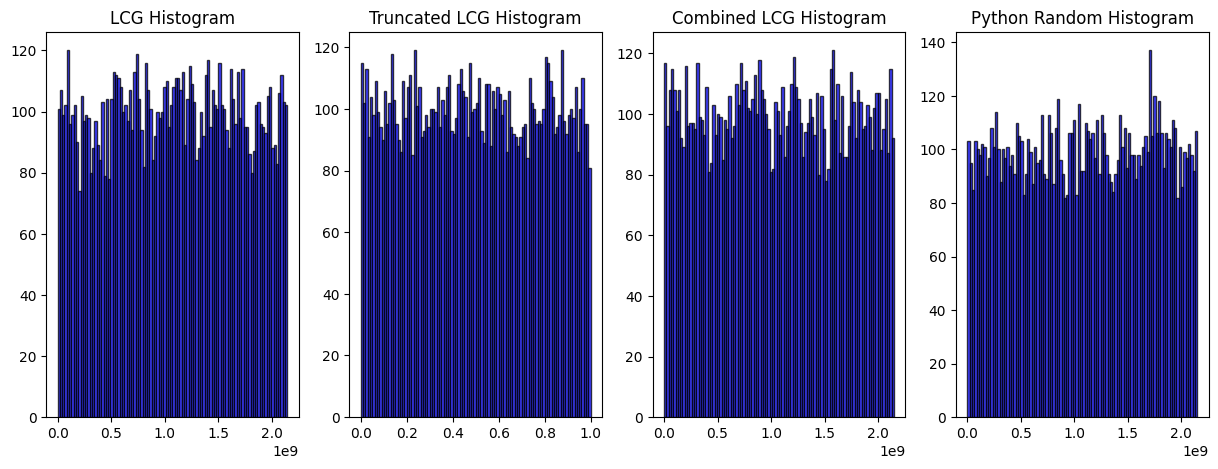

In [74]:
plt.figure(figsize=(15, 5))

plt.subplot(141)
plt.hist(lcg_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("LCG Histogram")

plt.subplot(142)
plt.hist(truncated_lcg_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("Truncated LCG Histogram")

plt.subplot(143)
plt.hist(combined_lcg_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("Combined LCG Histogram")

plt.subplot(144)
plt.hist(python_random_numbers, bins=num_bins, alpha=0.75, color='blue', edgecolor='black')
plt.title("Python Random Histogram")

plt.show()